In [1]:
from pylab import*

In [2]:
def RK2(ec_EDO , t , x0 , args=[] , delta=0.1):
    t_n = arange(t[0],t[1]+delta,delta)
    M , N = len(x0),len(t_n)
    sol = zeros((M,N))
    sol[:,0] = x0;
    for i in range(N-1):
        t_med = 0.5*(t_n[i]+t_n[i+1])
        x_med = sol[:,i] + 0.5*delta*ec_EDO(t_n[i],sol[:,i]) 
        sol[:,i+1] = sol[:,i] + delta*ec_EDO(t_med,x_med)
    return sol,t_n

In [3]:
def ec_dif3(t,y):
    return array([y[1],-y[0]])

In [4]:
y_t, t = RK2(ec_dif3,[0,20*pi],[7,0],delta=0.002)

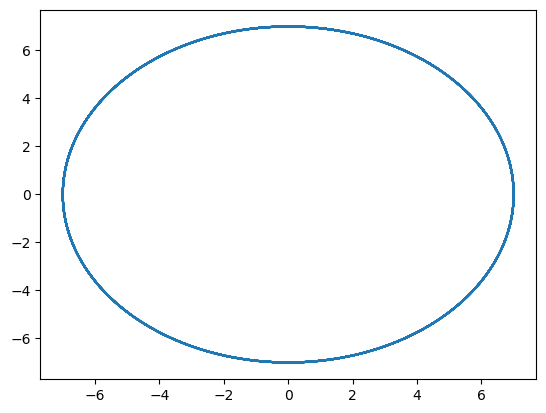

In [5]:
plot(y_t[0],y_t[1])
show()

In [16]:
def RK4(ec_EDO , t , x0 , args=[] , delta=0.1):
    t_n = arange(t[0],t[1]+delta,delta)
    M , N = len(x0),len(t_n)
    sol = zeros((M,N))
    sol[:,0] = x0;
    for i in range(N-1):
        k1 = ec_EDO(t_n[i],sol[:,i])
        k2 = ec_EDO(t_n[i]+0.5*delta,sol[:,i]+0.5*k1*delta)
        k3 = ec_EDO(t_n[i]+0.5*delta,sol[:,i]+0.5*k2*delta)
        k4 = ec_EDO(t_n[i]+delta,sol[:,i]+k3*delta)
        sol[:,i+1] = sol[:,i] +(delta/6)*(k1+(2*k2)+(2*k3)+k4)
    return sol,t_n

In [17]:
def ec_dif3(t,y):
    return array([y[1],-y[0]])

In [18]:
y_rk2 ,t_2 = RK2(ec_dif3,[0,20*pi],[7,0],delta =0.002)
y_rk4 ,t_4 = RK4(ec_dif3,[0,20*pi],[7,0])


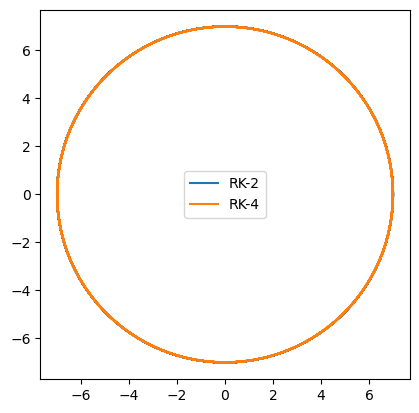

In [19]:
plot(y_rk2[0],y_rk2[1],label='RK-2')
plot(y_rk4[0],y_rk4[1],label='RK-4')
legend()
gca().set_aspect('equal')
show()

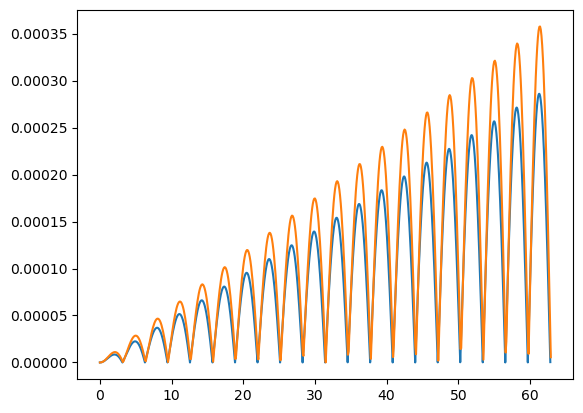

In [20]:
plot(t_2,abs(7*cos(t_2) - y_rk2[0]))
plot(t_4,abs(7*cos(t_4) - y_rk4[0]))
show()